In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\Chandan Gupta\\Documents\\Antrix_Academy_Python\\Covid19data.xlsx")

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland,China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland,China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland,China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland,China,1/22/2020 17:00,0,0,0


In [4]:
df.tail()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,NaN,2021-05-30 04:20:55,102641,2335,95289
306425,306426,05/29/2021,Zeeland,Netherlands,NaN,2021-05-30 04:20:55,29147,245,0
306426,306427,05/29/2021,Zhejiang,Mainland,China,2021-05-30 04:20:55,1364,1,1324
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,NaN,2021-05-30 04:20:55,87550,1738,83790
306428,306429,05/29/2021,Zuid-Holland,Netherlands,NaN,2021-05-30 04:20:55,391559,4252,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              306429 non-null  int64 
 1   ObservationDate  306429 non-null  object
 2   Province/State   228329 non-null  object
 3   Region           306428 non-null  object
 4   Country          31504 non-null   object
 5   Last Update      306429 non-null  object
 6   Confirmed        306429 non-null  int64 
 7   Deaths           306429 non-null  int64 
 8   Recovered        306429 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 21.0+ MB


In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [7]:
#1-To explore and visualize which country suffered the most in terms of Confirmed Cases and Deaths.

def countrywisevisual():
    dt = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(10)
    plt.bar(dt.index,dt.values,label = 'Confirmed Cases')
    dg = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(10)
    plt.bar(dg.index,dg.values,label = 'Deaths')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return dt,dg

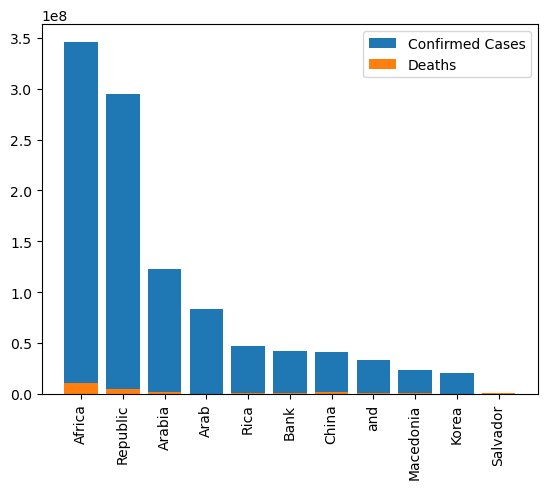

(Country
 Africa       345940039
 Republic     294861061
 Arabia       123111168
 Arab          83739255
 Rica          47395838
 Bank          41819444
 China         40822596
 and           33520767
 Macedonia     23650041
 Korea         20814483
 Name: Confirmed, dtype: int64,
 Country
 Africa       10250036
 Republic      4834020
 China         2089872
 Arabia        1861008
 and           1233505
 Macedonia      747709
 Rica           610944
 Bank           440378
 Salvador       433540
 Korea          346001
 Name: Deaths, dtype: int64)

In [8]:
countrywisevisual()

In [9]:
df['Recovered_rank'] = df['Recovered'].rank(method = 'max',ascending = False)
df.head(10)

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank
0,1,01/22/2020,Anhui,Mainland,China,1/22/2020 17:00,1,0,0,306426.0
1,2,01/22/2020,Beijing,Mainland,China,1/22/2020 17:00,14,0,0,306426.0
2,3,01/22/2020,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0,306426.0
3,4,01/22/2020,Fujian,Mainland,China,1/22/2020 17:00,1,0,0,306426.0
4,5,01/22/2020,Gansu,Mainland,China,1/22/2020 17:00,0,0,0,306426.0
5,6,01/22/2020,Guangdong,Mainland,China,1/22/2020 17:00,26,0,0,306426.0
6,7,01/22/2020,Guangxi,Mainland,China,1/22/2020 17:00,2,0,0,306426.0
7,8,01/22/2020,Guizhou,Mainland,China,1/22/2020 17:00,1,0,0,306426.0
8,9,01/22/2020,Hainan,Mainland,China,1/22/2020 17:00,4,0,0,306426.0
9,10,01/22/2020,Hebei,Mainland,China,1/22/2020 17:00,1,0,0,306426.0


In [10]:
#2-To explore which top 10 countries have the most recovered Cases. 

def recovered_countries():
    sr = df.groupby('Country')['Recovered_rank'].sum().sort_values(ascending = False).head(10)
    plt.bar(sr.index,sr.values,label = 'Recovered Countries')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return sr

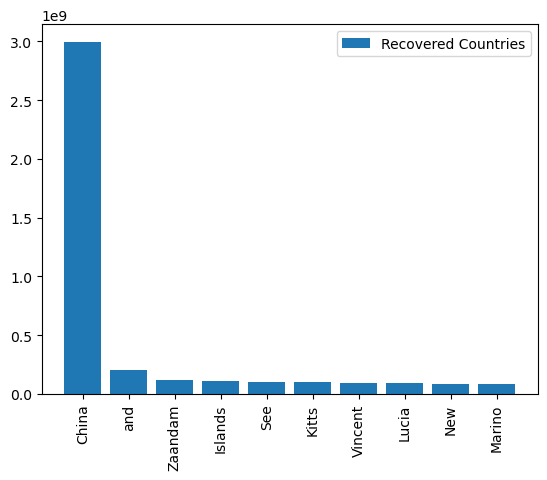

Country
China      2.996251e+09
and        2.055350e+08
Zaandam    1.179034e+08
Islands    1.081940e+08
See        1.044559e+08
Kitts      9.896410e+07
Vincent    9.168628e+07
Lucia      8.800945e+07
New        8.659410e+07
Marino     7.920492e+07
Name: Recovered_rank, dtype: float64

In [11]:
recovered_countries()

In [12]:
#3-Calculate recovery rates for each country

df['Recovery_Rate'] = (df['Recovered']/df['Confirmed'])*100
df.head(10)

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank,Recovery_Rate
0,1,01/22/2020,Anhui,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0
1,2,01/22/2020,Beijing,Mainland,China,1/22/2020 17:00,14,0,0,306426.0,0.0
2,3,01/22/2020,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0,306426.0,0.0
3,4,01/22/2020,Fujian,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0
4,5,01/22/2020,Gansu,Mainland,China,1/22/2020 17:00,0,0,0,306426.0,NaN
5,6,01/22/2020,Guangdong,Mainland,China,1/22/2020 17:00,26,0,0,306426.0,0.0
6,7,01/22/2020,Guangxi,Mainland,China,1/22/2020 17:00,2,0,0,306426.0,0.0
7,8,01/22/2020,Guizhou,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0
8,9,01/22/2020,Hainan,Mainland,China,1/22/2020 17:00,4,0,0,306426.0,0.0
9,10,01/22/2020,Hebei,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0


In [13]:
#4-Visualize Top 5 countries with highest recovery rate

def recovery_rates():
    sr1 = df.groupby('Country')['Recovery_Rate'].sum().sort_values(ascending = False).head()
    plt.bar(sr1.index,sr1.values,label = 'Recovery Rate')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return sr1

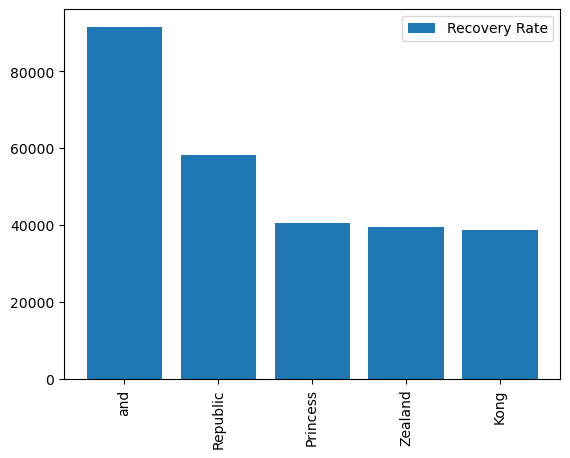

Country
and         91577.373726
Republic    58208.294935
Princess    40530.898876
Zealand     39366.016830
Kong        38584.969859
Name: Recovery_Rate, dtype: float64

In [14]:
recovery_rates()

In [15]:
#5-Country wise status of covid19.

def Country_status():
    dt1 = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(10)
    dt2 = df.groupby('Country')['Recovered'].sum().sort_values(ascending = False).head(10)
    dt3 = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(10)
    plt.bar(dt1.index,dt1.values,label = 'Confirmed Cases')
    plt.bar(dt2.index,dt2.values,label = 'Recovered Cases')
    plt.bar(dt3.index,dt3.values,label = 'Death Cases')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return dt1,dt2,dt3

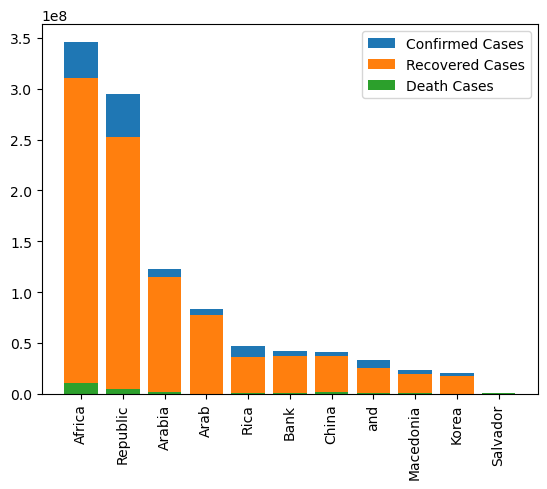

(Country
 Africa       345940039
 Republic     294861061
 Arabia       123111168
 Arab          83739255
 Rica          47395838
 Bank          41819444
 China         40822596
 and           33520767
 Macedonia     23650041
 Korea         20814483
 Name: Confirmed, dtype: int64,
 Country
 Africa       310037579
 Republic     252299659
 Arabia       114581500
 Arab          77929785
 Bank          37003116
 China         36897441
 Rica          35964758
 and           25502545
 Macedonia     19378833
 Korea         18083341
 Name: Recovered, dtype: int64,
 Country
 Africa       10250036
 Republic      4834020
 China         2089872
 Arabia        1861008
 and           1233505
 Macedonia      747709
 Rica           610944
 Bank           440378
 Salvador       433540
 Korea          346001
 Name: Deaths, dtype: int64)

In [16]:
Country_status()

In [17]:
#6-Linear Scale plot for Total Confirmed Cases, Death, Recovery

def linear_plot_trend():
    dt1 = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(15)
    dt2 = df.groupby('Country')['Recovered'].sum().sort_values(ascending = False).head(15)
    dt3 = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(15)
    plt.plot(dt1.index,dt1.values,label = 'Confirmed Cases')
    plt.plot(dt2.index,dt2.values,label = 'Recovered Cases')
    plt.plot(dt3.index,dt3.values,label = 'Death Cases')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return dt1,dt2,dt3

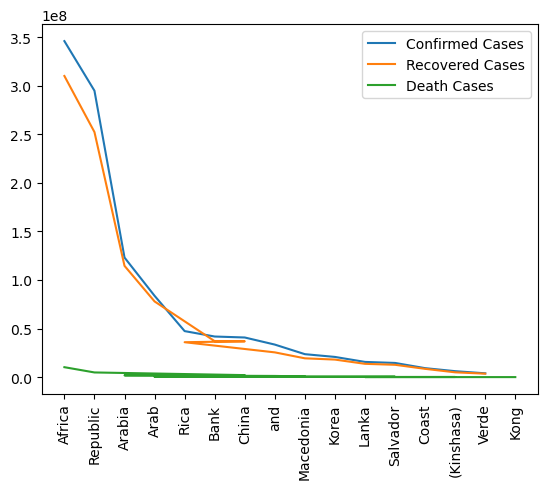

(Country
 Africa        345940039
 Republic      294861061
 Arabia        123111168
 Arab           83739255
 Rica           47395838
 Bank           41819444
 China          40822596
 and            33520767
 Macedonia      23650041
 Korea          20814483
 Lanka          15676007
 Salvador       14619435
 Coast           9253034
 (Kinshasa)      6148539
 Verde           3941086
 Name: Confirmed, dtype: int64,
 Country
 Africa        310037579
 Republic      252299659
 Arabia        114581500
 Arab           77929785
 Bank           37003116
 China          36897441
 Rica           35964758
 and            25502545
 Macedonia      19378833
 Korea          18083341
 Lanka          13707143
 Salvador       12722159
 Coast           8545330
 (Kinshasa)      4960011
 Verde           3578423
 Name: Recovered, dtype: int64,
 Country
 Africa        10250036
 Republic       4834020
 China          2089872
 Arabia         1861008
 and            1233505
 Macedonia       747709
 Rica          

In [18]:
linear_plot_trend()

In [19]:
#7-Lets check the Trend of the virus

def covid_trend():
    dt1 = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(25)
    plt.plot(dt1.index,dt1.values,label = 'Confirmed Cases')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    return dt1

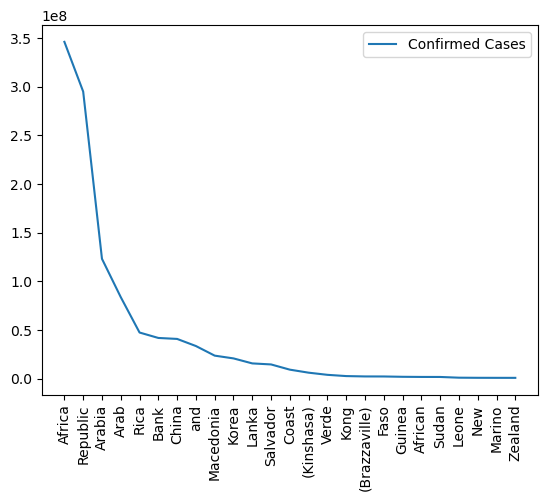

Country
Africa           345940039
Republic         294861061
Arabia           123111168
Arab              83739255
Rica              47395838
Bank              41819444
China             40822596
and               33520767
Macedonia         23650041
Korea             20814483
Lanka             15676007
Salvador          14619435
Coast              9253034
(Kinshasa)         6148539
Verde              3941086
Kong               2655935
(Brazzaville)      2286750
Faso               2249316
Guinea             1919781
African            1776825
Sudan              1748600
Leone              1008350
New                 886555
Marino              851906
Zealand             836280
Name: Confirmed, dtype: int64

In [20]:
covid_trend()

In [21]:
#8-Make a subplot to country wise data with Confirmed case and death

def linear_subplot_trend():
    dt1 = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(15)
    plt.subplot(2,1,1)
    plt.plot(dt1.index,dt1.values,label = 'Confirmed Cases')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    
    dt2 = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(15)
    plt.subplot(2,1,1)
    plt.plot(dt2.index,dt2.values,label = 'Death Cases',color = 'red')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    
    return dt1,dt2

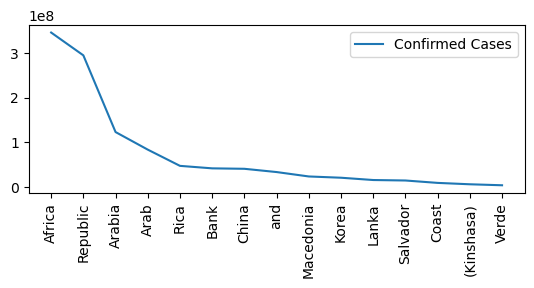

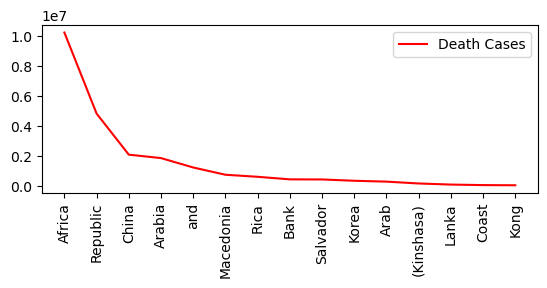

(Country
 Africa        345940039
 Republic      294861061
 Arabia        123111168
 Arab           83739255
 Rica           47395838
 Bank           41819444
 China          40822596
 and            33520767
 Macedonia      23650041
 Korea          20814483
 Lanka          15676007
 Salvador       14619435
 Coast           9253034
 (Kinshasa)      6148539
 Verde           3941086
 Name: Confirmed, dtype: int64,
 Country
 Africa        10250036
 Republic       4834020
 China          2089872
 Arabia         1861008
 and            1233505
 Macedonia       747709
 Rica            610944
 Bank            440378
 Salvador        433540
 Korea           346001
 Arab            288328
 (Kinshasa)      164914
 Lanka            91579
 Coast            56433
 Kong             45325
 Name: Deaths, dtype: int64)

In [22]:
linear_subplot_trend()

In [23]:
#9-Make a chart to show overall covid19 data death, confirm, recovery

def overall_covid_trend():
    dt1 = df.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(25)
    plt.subplot(2,1,1)
    plt.plot(dt1.index,dt1.values,label = 'Confirmed Cases')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    
    dt2 = df.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(25)
    plt.subplot(2,1,1)
    plt.plot(dt2.index,dt2.values,label = 'Death Cases',color = 'red')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    
    dt3 = df.groupby('Country')['Recovered'].sum().sort_values(ascending = False).head(25)
    plt.subplot(2,1,1)
    plt.plot(dt3.index,dt3.values,label = 'Recovered Cases',color = 'green')
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()
    

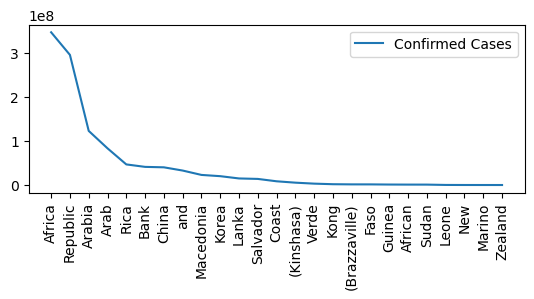

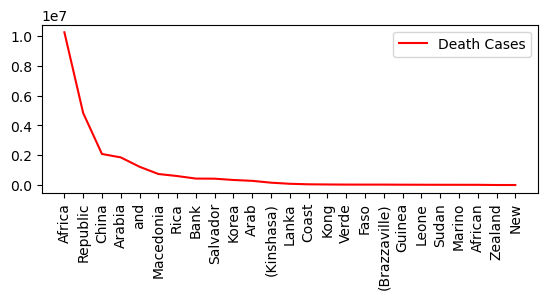

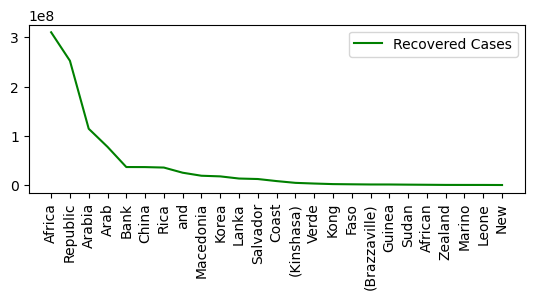

In [24]:
overall_covid_trend()

In [25]:
df.head()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank,Recovery_Rate
0,1,01/22/2020,Anhui,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0
1,2,01/22/2020,Beijing,Mainland,China,1/22/2020 17:00,14,0,0,306426.0,0.0
2,3,01/22/2020,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0,306426.0,0.0
3,4,01/22/2020,Fujian,Mainland,China,1/22/2020 17:00,1,0,0,306426.0,0.0
4,5,01/22/2020,Gansu,Mainland,China,1/22/2020 17:00,0,0,0,306426.0,NaN


In [26]:
#10-Define a function for country to show below details

def Country_details(country):
    print("Enter the name of the Country :",country)
    dt = df[df['Country'] == country]
    
    if dt.shape[0] > 0:
        conf = dt['Confirmed'].sum()
        dths = dt['Deaths'].sum()
        rcvrd = dt['Recovered'].sum()
        rcvr_rte = round(((dt['Recovered'].sum()/dt['Confirmed'].sum())*100))
        
        df1 = pd.DataFrame({'Total Confirmed Cases':[conf],'Total Deaths':[dths],'Recovered Cases':[rcvrd],'Recovery Rate':[rcvr_rte]})
        
        return df1
        
    else:
        print('Record not found!!!!')

In [27]:
Country_details('China')

Enter the name of the Country : China


,Total Confirmed Cases,Total Deaths,Recovered Cases,Recovery Rate
0,40822596,2089872,36897441,90


In [28]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

In [29]:
df['Month'] = df['Last Update'].dt.month_name()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  object        
 2   Province/State   228329 non-null  object        
 3   Region           306428 non-null  object        
 4   Country          31504 non-null   object        
 5   Last Update      306429 non-null  datetime64[ns]
 6   Confirmed        306429 non-null  int64         
 7   Deaths           306429 non-null  int64         
 8   Recovered        306429 non-null  int64         
 9   Recovered_rank   306429 non-null  float64       
 10  Recovery_Rate    302698 non-null  float64       
 11  Month            306429 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 28.1+ MB


In [31]:
df.head()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank,Recovery_Rate,Month
0,1,01/22/2020,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.0,January
1,2,01/22/2020,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,306426.0,0.0,January
2,3,01/22/2020,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,306426.0,0.0,January
3,4,01/22/2020,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.0,January
4,5,01/22/2020,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,306426.0,NaN,January


In [36]:
#11- Define a function for monthly details for given month

def monthly_covid_report(month):
    print("Enter the name of the Month :",month)
    df1 = df.groupby('Country')['Month'].agg({'Confirmed':sum,'Deaths':sum,'Recovered':sum,'Recovery_Rate':np.mean})
    dt = df1[df1['Month'] == month]
    
    if dt.shape[0] > 0:
        cntry = dt['Country']
        conf = dt['Confirmed'].sum()
        dths = dt['Deaths'].sum()
        rcvrd = dt['Recovered'].sum()
        rcvr_rte = round((dt['Recovered'].sum()/dt['Confirmed'].sum())*100)
        
        df1 = pd.DataFrame({'Country':[cntry],'Total Confirmed Cases':[conf],'Total Deaths':[dths],'Recovered Cases':[rcvrd],'Recovery Rate':[rcvr_rte]})
        
        return df1
        
    else:
        print('Record not found!!!!')

In [37]:
df['Year'] = pd.DatetimeIndex(df['Last Update']).year

In [38]:
df

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank,Recovery_Rate,Month,Year
0,1,01/22/2020,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.000000,January,2020
1,2,01/22/2020,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,306426.0,0.000000,January,2020
2,3,01/22/2020,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,306426.0,0.000000,January,2020
3,4,01/22/2020,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.000000,January,2020
4,5,01/22/2020,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,306426.0,NaN,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,NaN,2021-05-30 04:20:55,102641,2335,95289,31646.0,92.837170,May,2021
306425,306426,05/29/2021,Zeeland,Netherlands,NaN,2021-05-30 04:20:55,29147,245,0,306426.0,0.000000,May,2021
306426,306427,05/29/2021,Zhejiang,Mainland,China,2021-05-30 04:20:55,1364,1,1324,160454.0,97.067449,May,2021
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,NaN,2021-05-30 04:20:55,87550,1738,83790,34401.0,95.705311,May,2021


In [39]:
dth = df.groupby('Country')['Year']
dth.head()

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
13231    2020
13243    2020
13555    2020
13567    2020
13879    2020
Name: Year, Length: 214, dtype: int64

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
#12-Using Algorithm predicted the case for next year or month.

lr = LinearRegression()
x = df[['Year','Confirmed']]
y = df['Deaths']
lr.fit(x,y)
lr.score(x,y)

0.7893011898767243

In [42]:
df['Outcome_linear'] = lr.predict(x)

In [43]:
df.head()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovered_rank,Recovery_Rate,Month,Year,Outcome_linear
0,1,01/22/2020,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.0,January,2020,180.765234
1,2,01/22/2020,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,306426.0,0.0,January,2020,181.031899
2,3,01/22/2020,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,306426.0,0.0,January,2020,180.867798
3,4,01/22/2020,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,306426.0,0.0,January,2020,180.765234
4,5,01/22/2020,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,306426.0,NaN,January,2020,180.744722
